# NYC Airbnb Data Cleaning

## Objective
Clean and prepare the NYC Airbnb dataset by handling missing values,
correcting invalid entries, standardizing formats, and removing outliers
to make the data suitable for analysis and modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/raw/Airbnb_Open_Data.csv", low_memory = False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

__*Standarizing Column Names*__

In [4]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
data.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [6]:
data[['price', 'service_fee']].head()

,price,service_fee
0,$966,$193
1,$142,$28
2,$620,$124
3,$368,$74
4,$204,$41


In [7]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [8]:
data['service_fee'] = data['service_fee'].str.replace('$','').str.replace(',','').astype(float)

- `$` sign is removed from the `price` and `service_price` column

In [9]:
data[['price', 'service_fee']].head()

,price,service_fee
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [11]:
data['instant_bookable'].value_counts()

instant_bookable
False    51474
True     51020
Name: count, dtype: int64

In [12]:
data['instant_bookable'] = data['instant_bookable'].astype(bool)

- `instant_bookable` answers a yes/no question:
So logically, it is a binary feature:
  - True → Instant booking enabled
  - False → Instant booking disabled

In [13]:
data['last_review'].nunique()

2477

In [14]:
data['last_review'].head()

0    10/19/2021
1     5/21/2022
2           NaN
3      7/5/2019
4    11/19/2018
Name: last_review, dtype: object

In [15]:
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

- Date column is converted to datetime 

In [17]:
data['id'].nunique()

102058

In [18]:
data.duplicated().sum()

np.int64(541)

- 541 rows are duplicated So we can remove them from the dataset as they are redundant rows
- And from the count of the unique id as well we can see that the rows are duplicated.

In [19]:
data.drop_duplicates(inplace = True)

In [20]:
data.shape

(102058, 26)

In [21]:
data.isna().sum().sort_values(ascending = False)

license                           102056
house_rules                        51842
last_review                        15832
reviews_per_month                  15818
country                              532
availability_365                     448
host_name                            404
minimum_nights                       400
calculated_host_listings_count       319
review_rate_number                   319
host_identity_verified               289
service_fee                          273
name                                 250
price                                247
construction_year                    214
number_of_reviews                    183
country_code                         131
cancellation_policy                   76
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
host_id                                0
id                                     0
instant_bookable

In [22]:
data.drop('license', axis = 1, inplace = True)

- `License` is removed from the dataset because almost all the values were missing

In [23]:
data['house_rules'].value_counts()

house_rules
#NAME?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

- Only 50% has a house rule so we can categorize the dataset with the column `has_house_rules`, If `house_rules` exist then it will return True and if not then False

In [24]:
data['has_house_rules'] = data['house_rules'].notna() & (data['house_rules'].str.strip() != '')

In [25]:
data['has_house_rules'].value_counts()

has_house_rules
False    51842
True     50216
Name: count, dtype: int64

In [26]:
data = data.drop('house_rules', axis = 1)

In [27]:
data.isna().sum().sort_values(ascending = False)

last_review                       15832
reviews_per_month                 15818
country                             532
availability_365                    448
host_name                           404
minimum_nights                      400
calculated_host_listings_count      319
review_rate_number                  319
host_identity_verified              289
service_fee                         273
name                                250
price                               247
construction_year                   214
number_of_reviews                   183
country_code                        131
cancellation_policy                  76
neighbourhood_group                  29
neighbourhood                        16
long                                  8
lat                                   8
id                                    0
host_id                               0
instant_bookable                      0
room_type                             0
has_house_rules                       0


In [28]:
data['reviews_per_month'].describe()

count    86240.000000
mean         1.375408
std          1.748019
min          0.010000
25%          0.220000
50%          0.740000
75%          2.010000
max         90.000000
Name: reviews_per_month, dtype: float64

In [29]:
data['reviews_per_month'].unique()

array([ 0.21,  0.38,   nan, ...,  7.73, 24.49, 33.08], shape=(1017,))

- Here we can fill `reviews_per_month` table with 0 because maximum nnumber of values lies in the range of 0

In [30]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [31]:
data['country'].value_counts()

country
United States    101526
Name: count, dtype: int64

- As the dataset has a one unique country `United States`,the data is redundant so we can remove it from the dataset

In [32]:
data = data.drop('country', axis = 1)

In [33]:
data.isna().sum().sort_values(ascending = False)

last_review                       15832
availability_365                    448
host_name                           404
minimum_nights                      400
review_rate_number                  319
calculated_host_listings_count      319
host_identity_verified              289
service_fee                         273
name                                250
price                               247
construction_year                   214
number_of_reviews                   183
country_code                        131
cancellation_policy                  76
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
id                                    0
host_id                               0
room_type                             0
instant_bookable                      0
reviews_per_month                     0
has_house_rules                       0
dtype: int64

__Availability 365__

In [34]:
data['availability_365'].value_counts()

availability_365
 0.0       23448
 365.0      2484
 364.0      1162
 89.0        746
 1.0         731
           ...  
 412.0        32
-6.0          31
 391.0        30
 401.0        30
 3677.0        1
Name: count, Length: 438, dtype: int64

In [35]:
wrong_availability_data = data[(data['availability_365']>= 0) & (data['availability_365']>365)]

In [36]:
wrong_availability_data.describe()

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,2.754000e+03,2.754000e+03,2754.000000,2754.000000,2736.000000,2743.000000,2745.000000,2738.000000,2754.000000,2244,2754.000000,2740.000000,2728.000000,2754.000000
mean,1.201000e+07,4.941360e+10,40.731810,-73.958757,2012.387792,613.321181,122.522404,7.128926,34.762527,2018-03-06 08:00:00,0.703301,3.016058,4.549487,396.826071
min,1.004098e+06,1.706859e+08,40.545500,-74.161780,2003.000000,50.000000,10.000000,-2.000000,0.000000,2013-01-01 00:00:00,0.000000,1.000000,1.000000,366.000000
25%,3.891108e+06,2.477762e+10,40.690900,-73.983830,2007.000000,333.000000,67.000000,1.000000,1.000000,2016-09-27 18:00:00,0.030000,2.000000,1.000000,380.000000
50%,6.577633e+06,4.945081e+10,40.725690,-73.958960,2012.000000,592.000000,118.000000,3.000000,7.000000,2018-12-21 00:00:00,0.180000,3.000000,1.000000,396.000000
75%,9.299506e+06,7.425132e+10,40.766450,-73.942990,2017.000000,895.000000,179.000000,5.000000,42.000000,2019-06-14 00:00:00,0.870000,4.000000,2.000000,411.000000
max,4.898461e+07,9.871892e+10,40.896940,-73.712990,2022.000000,1199.000000,240.000000,365.000000,597.000000,2024-08-15 00:00:00,8.820000,5.000000,121.000000,3677.000000
std,1.520183e+07,2.831037e+10,0.052514,0.035633,5.751641,330.624482,66.060840,16.798049,58.150989,NaN,1.128047,1.426205,15.417991,64.971484


<Axes: ylabel='availability_365'>

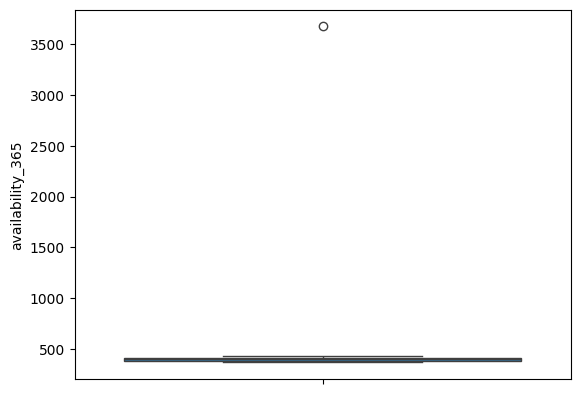

In [37]:
sns.boxplot(wrong_availability_data['availability_365'])

In [38]:
data.loc[data['availability_365'] > 365, 'availability_365'] = 365

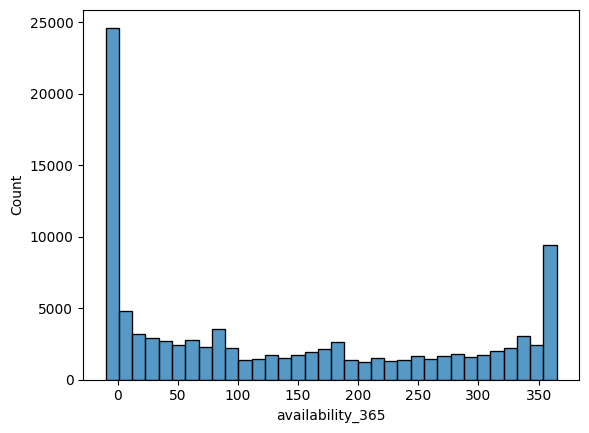

In [39]:
sns.histplot(data['availability_365'])
plt.show()

In [44]:
data[data['availability_365'] == 0].describe()

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,2.344800e+04,2.344800e+04,23448.000000,23448.000000,23429.000000,23385.000000,23370.000000,23412.000000,23421.000000,18255,23448.000000,23403.000000,23376.000000,23448.0
mean,3.419035e+07,4.944501e+10,40.729019,-73.954860,2012.469333,626.995553,125.378605,6.337263,10.212800,2018-09-03 14:12:28.989318144,0.452979,3.266504,2.093344,0.0
min,1.086390e+06,1.236005e+08,40.522110,-74.198260,2003.000000,50.000000,10.000000,-365.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,0.0
25%,1.757075e+07,2.468437e+10,40.692320,-73.981442,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-09-30 00:00:00,0.030000,2.000000,1.000000,0.0
50%,3.853233e+07,4.966240e+10,40.721255,-73.955660,2012.000000,628.000000,126.000000,3.000000,3.000000,2018-09-02 00:00:00,0.150000,3.000000,1.000000,0.0
75%,4.697658e+07,7.432139e+10,40.762248,-73.939560,2017.000000,917.000000,183.000000,5.000000,9.000000,2019-05-18 00:00:00,0.480000,4.000000,1.000000,0.0
max,5.736686e+07,9.876313e+10,40.907340,-73.726000,2022.000000,1200.000000,240.000000,5645.000000,424.000000,2022-05-05 00:00:00,18.060000,5.000000,332.000000,0.0
std,1.543820e+07,2.861320e+10,0.051893,0.037600,5.743118,333.332198,66.665116,39.566008,23.805474,NaN,0.854800,1.287705,10.196269,0.0


In [45]:
data[data['availability_365'] == 0].shape

(23448, 24)

- About 23448 records have 0 days of availability 

In [47]:
data.isna().sum()

id                                    0
name                                250
host_id                               0
host_identity_verified              289
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
country_code                        131
instant_bookable                      0
cancellation_policy                  76
room_type                             0
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      400
number_of_reviews                   183
last_review                       15832
reviews_per_month                     0
review_rate_number                  319
calculated_host_listings_count      319
availability_365                    448
has_house_rules                       0
dtype: int64

__Number of reviews__

In [54]:
data['number_of_reviews'].value_counts()

number_of_reviews
0.0       15673
1.0       10348
2.0        7129
3.0        5341
4.0        4125
          ...  
1010.0        1
446.0         1
490.0         1
400.0         1
300.0         1
Name: count, Length: 476, dtype: int64

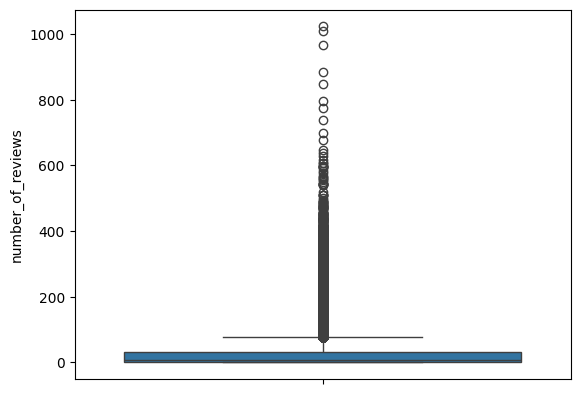

In [57]:
sns.boxplot(data['number_of_reviews'])
plt.show()

In [61]:
data['number_of_reviews'] = data['number_of_reviews'].fillna(0)

In [63]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

`number_of_reviews` and `reviews_per_month` they are filled with 0

In [64]:
data.isna().sum()

id                                    0
name                                250
host_id                               0
host_identity_verified              289
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
country_code                        131
instant_bookable                      0
cancellation_policy                  76
room_type                             0
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      400
number_of_reviews                     0
last_review                       15832
reviews_per_month                     0
review_rate_number                  319
calculated_host_listings_count      319
availability_365                    448
has_house_rules                       0
dtype: int64

__review rate number__

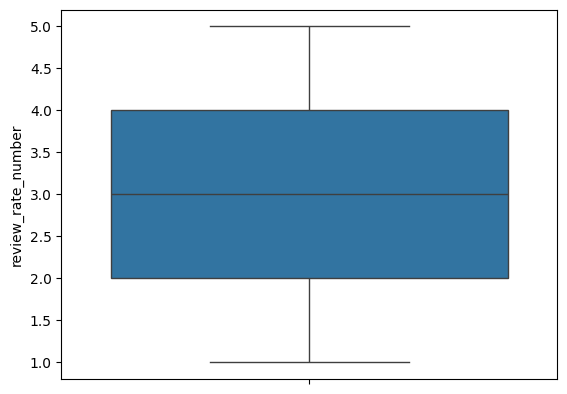

In [66]:
sns.boxplot(data['review_rate_number'])
plt.show()

In [68]:
data['review_rate_number'].value_counts()

review_rate_number
5.0    23251
4.0    23200
3.0    23130
2.0    22972
1.0     9186
Name: count, dtype: int64

In [71]:
data['review_rate_number'] = data['review_rate_number'].fillna(
    data['review_rate_number'].median()
)


The `review_rate_number` column contains valid ordinal ratings from 1 to 5.
Missing values were filled using the median rating to preserve the central
tendency of the distribution while avoiding distortion from outliers.


In [ ]:
num_col = [ i for i in data.columns if data[i].dtype != 'object']
cat_col = [i for i in data.columns if data[i].dtype == 'object']

__Heatmap__

<Axes: >

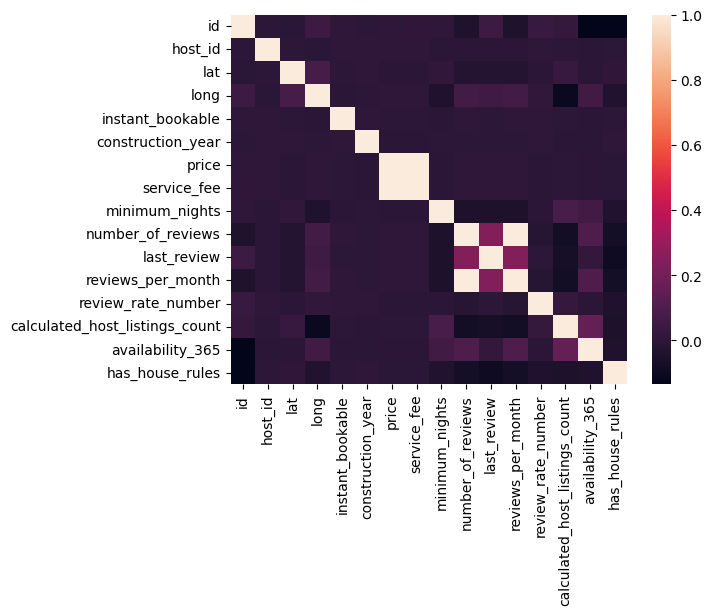

In [78]:
sns.heatmap(data[num_col].corr())


In [81]:
corr_matrix = data[num_col].corr()

upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find perfect correlations
perfect_corr = (
    upper_triangle
    .stack()
    .loc[lambda x: abs(x)  > 0.90]
)

perfect_corr


price              service_fee          0.999991
number_of_reviews  reviews_per_month    1.000000
dtype: float64

- We can see that the price and service fee are perfectly correlated 

In [82]:
data = data.drop('service_fee', axis = 1)

In [83]:
data = data.drop('reviews_per_month', axis = 1)

- The perfectly correlated variables are removed as they are redundant.

__Cancellation Policy__

In [87]:
data['cancellation_policy'].value_counts()

cancellation_policy
moderate    34162
strict      33929
flexible    33891
Name: count, dtype: int64

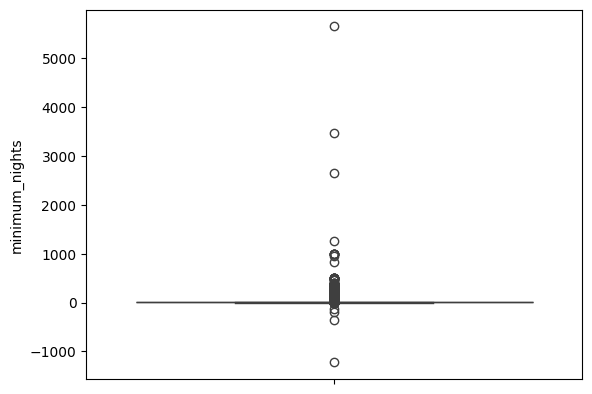

In [89]:
sns.boxplot(data['minimum_nights'])
plt.show()

In [90]:
data.loc[data['minimum_nights'] < 0, 'minimum_nights'] = 0

In [95]:
data = data.drop('name', axis = 1)

__Construction Year__

In [96]:
data['construction_year'].fillna(data['construction_year'].median())

0         2020.0
1         2007.0
2         2005.0
3         2005.0
4         2009.0
           ...  
102053    2012.0
102054    2012.0
102055    2012.0
102056    2012.0
102057    2011.0
Name: construction_year, Length: 102058, dtype: float64

__Neighbourhood Group__

In [99]:
data['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: count, dtype: int64

In [100]:
data['neighbourhood_group'].fillna(data['neighbourhood_group'].mode())

0          Brooklyn
1         Manhattan
2         Manhattan
3          Brooklyn
4         Manhattan
            ...    
102053     Brooklyn
102054     Brooklyn
102055     Brooklyn
102056    Manhattan
102057    Manhattan
Name: neighbourhood_group, Length: 102058, dtype: object

In [103]:
data['neighbourhood_group'] = data['neighbourhood_group'].replace({
    'brookln': 'Brooklyn',
    'manhatan': 'Manhattan'
})


In [104]:
data['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: count, dtype: int64

- Inconsistence names are standarized for the `neighbour group` column.

`Calculated host listings Count`

In [106]:
data['calculated_host_listings_count'].value_counts()

calculated_host_listings_count
1.0     63121
2.0     14380
3.0      6536
4.0      3529
5.0      1977
        ...  
86.0       21
22.0       20
55.0       15
46.0        9
80.0        7
Name: count, Length: 78, dtype: int64

<Axes: ylabel='calculated_host_listings_count'>

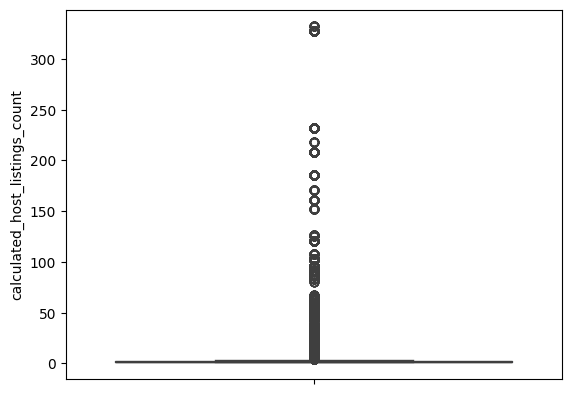

In [107]:
sns.boxplot(data['calculated_host_listings_count'])

In [108]:
data['calculated_host_listings_count'].fillna(data['calculated_host_listings_count'].median())

0         6.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
102053    1.0
102054    2.0
102055    2.0
102056    1.0
102057    1.0
Name: calculated_host_listings_count, Length: 102058, dtype: float64

In [109]:
data.isna().sum()

id                                    0
host_id                               0
host_identity_verified              289
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
country_code                        131
instant_bookable                      0
cancellation_policy                  76
room_type                             0
construction_year                   214
price                               247
minimum_nights                      400
number_of_reviews                     0
last_review                       15832
review_rate_number                    0
calculated_host_listings_count      319
availability_365                    448
has_house_rules                       0
dtype: int64

In [129]:
(data.isna().sum().sort_values(ascending=False) / data.shape[0]) * 100

last_review                       15.512748
id                                 0.000000
host_identity_verified             0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
lat                                0.000000
neighbourhood                      0.000000
instant_bookable                   0.000000
cancellation_policy                0.000000
room_type                          0.000000
long                               0.000000
construction_year                  0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
review_rate_number                 0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
has_house_rules                    0.000000
dtype: float64

All the rows that are missing are very small so they can we simply eliminated or can be filled. I choosed to fill it with the other values depending on the column.

__Filling the missing values__

In [110]:
data['host_identity_verified'] = data['host_identity_verified'].fillna(
    data['host_identity_verified'].mode()[0]
)


In [111]:
data['host_identity_verified'] = data['host_identity_verified'].fillna(
    data['host_identity_verified'].mode()[0]
)


In [112]:
data['neighbourhood_group'] = data['neighbourhood_group'].fillna(
    data['neighbourhood_group'].mode()[0]
)


In [113]:
data['neighbourhood'] = data['neighbourhood'].fillna(
    data['neighbourhood'].mode()[0]
)


In [114]:
data['lat'] = data['lat'].fillna(data['lat'].median())
data['long'] = data['long'].fillna(data['long'].median())


In [115]:
data.drop(columns=['country_code'], inplace=True)


In [116]:
data['cancellation_policy'] = data['cancellation_policy'].fillna(
    data['cancellation_policy'].mode()[0]
)


In [117]:
data['construction_year'] = data['construction_year'].fillna(
    data['construction_year'].median()
)


In [118]:
data['price'] = data['price'].fillna(data['price'].median())


In [119]:
data['minimum_nights'] = data['minimum_nights'].fillna(
    data['minimum_nights'].median()
)


In [120]:
data['calculated_host_listings_count'] = (
    data['calculated_host_listings_count']
    .fillna(data['calculated_host_listings_count'].median())
)


In [121]:
data['availability_365'] = data['availability_365'].fillna(
    data['availability_365'].median()
)


In [123]:
data['host_name'] = data['host_name'].fillna(
    "Unknown"
)


In [124]:
data.isna().sum()

id                                    0
host_id                               0
host_identity_verified                0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                      0
cancellation_policy                   0
room_type                             0
construction_year                     0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       15832
review_rate_number                    0
calculated_host_listings_count        0
availability_365                      0
has_house_rules                       0
dtype: int64

Missing values were handled using a combination of mode and median imputation
based on feature type and business logic. Identifier-like columns were filled
with placeholders, low-variance columns were removed, and date fields were
left unfilled to avoid introducing artificial information.


In [131]:
data.to_csv('../data/clean/airbnb_cleaned.csv', index=False)

The cleaned Airbnb NYC dataset was saved to the `data/clean` directory
to preserve the original raw data and enable reproducible downstream
analysis and visualization.
